In [ ]:
import pandas as pd
import numpy as np
import pandas_datareader.data as web
from itertools import product

import datetime
import matplotlib.pyplot as plt

#取得するデータの開始日と最終日を指定
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2024, 5, 1)

df = web.DataReader('sp500', 'fred', start, end)
df.index.freq = 'B'
df = df.interpolate(limit=1, limit_direction='both')
df.head()

: 

<Axes: xlabel='DATE'>

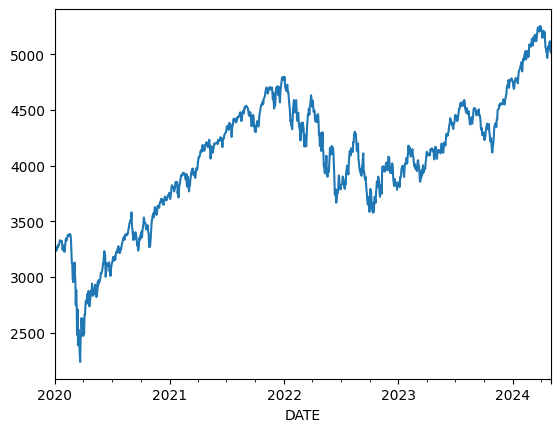

In [13]:
df['sp500'].plot()

C:\Users\uraso\AppData\Local\Temp\ipykernel_16968\1313585574.py:21: UserWarning: Glyph 20803 (\N{CJK UNIFIED IDEOGRAPH-5143}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\uraso\AppData\Local\Temp\ipykernel_16968\1313585574.py:21: UserWarning: Glyph 12487 (\N{KATAKANA LETTER DE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\uraso\AppData\Local\Temp\ipykernel_16968\1313585574.py:21: UserWarning: Glyph 12540 (\N{KATAKANA-HIRAGANA PROLONGED SOUND MARK}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\uraso\AppData\Local\Temp\ipykernel_16968\1313585574.py:21: UserWarning: Glyph 12479 (\N{KATAKANA LETTER TA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\uraso\AppData\Local\Temp\ipykernel_16968\1313585574.py:21: UserWarning: Glyph 12488 (\N{KATAKANA LETTER TO}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\uraso\AppData\Local\Temp\ipykernel_16968\1313585574.py:21: UserWarning: Glyph 12524 (\N{KATAKANA L

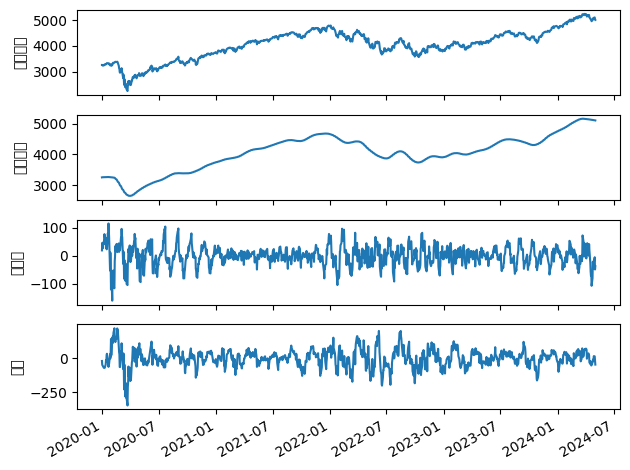

In [14]:
from statsmodels.tsa.seasonal import seasonal_decompose, STL

advanced_decomposition = STL(df.sp500, period=30).fit()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4, ncols=1, sharex=True)

ax1.plot(advanced_decomposition.observed)
ax1.set_ylabel('元データ')

ax2.plot(advanced_decomposition.trend)
ax2.set_ylabel('トレンド')

ax3.plot(advanced_decomposition.seasonal)
ax3.set_ylabel('季節性')

ax4.plot(advanced_decomposition.resid)
ax4.set_ylabel('残差')


fig.autofmt_xdate()
plt.tight_layout()

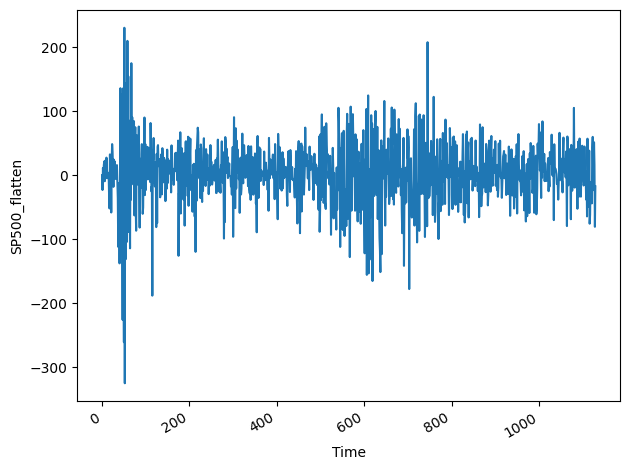

In [15]:
df_diff = np.diff(df['sp500'], n=1)

fig, ax = plt.subplots()

ax.plot(df_diff)
ax.set_xlabel('Time')
ax.set_ylabel('SP500_flatten')

fig.autofmt_xdate()
plt.tight_layout()

In [18]:
from statsmodels.tsa.stattools import adfuller

ad_fuller_result = adfuller(df_diff)

print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -10.105974754120302
p-value: 1.0297233813644336e-17


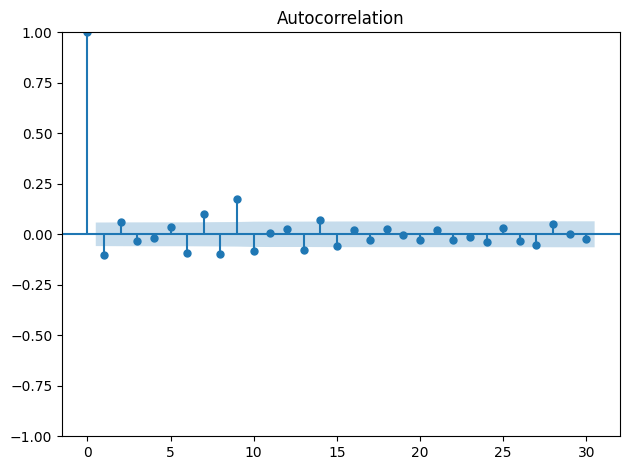

In [19]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df_diff, lags=30)
plt.tight_layout()